Problem Statement 1:
There is an automobile company Cars24X7 from India  which aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.
They want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Japanese market.  Essentially, the company wants to know:
Which variables are significant in predicting the price of a car How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered  a large dataset of different types of cars across the American market.
Business Objectives:
You as a Data scientist are required to apply some data science techniques  for the price of cars with the available independent variables.  That should help the management to understand how exactly the prices vary with the independent variables. 
 They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels.
 Also build the Random Forest Regressor for optimal search of classifiers.
Dataset: data1.csv
Note : kindly build the project with following pointers
		1.Data understanding and exploration
		2.Data cleaning
		3.Data preparation


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df=pd.read_csv(r"C:\Users\91888\Downloads\car.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
df.shape

(301, 9)

In [11]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

C:\Users\91888\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1000x1000 with 0 Axes>

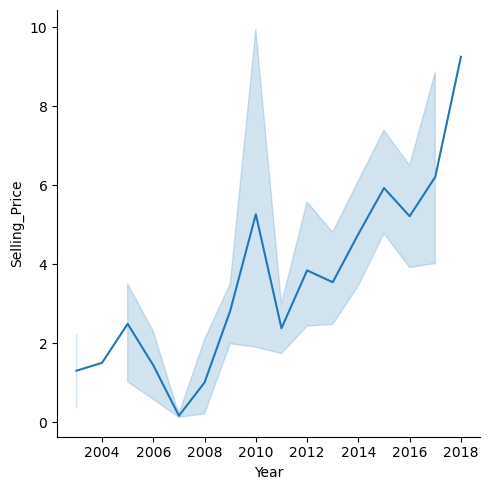

In [15]:
fig=plt.figure(figsize=(10,10))
sns.relplot('Year','Selling_Price',data=df,kind='line')

In [16]:
#highest and lowest price
df["Selling_Price"].describe()

count    301.000000
mean       4.661296
std        5.082812
min        0.100000
25%        0.900000
50%        3.600000
75%        6.000000
max       35.000000
Name: Selling_Price, dtype: float64

C:\Users\91888\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


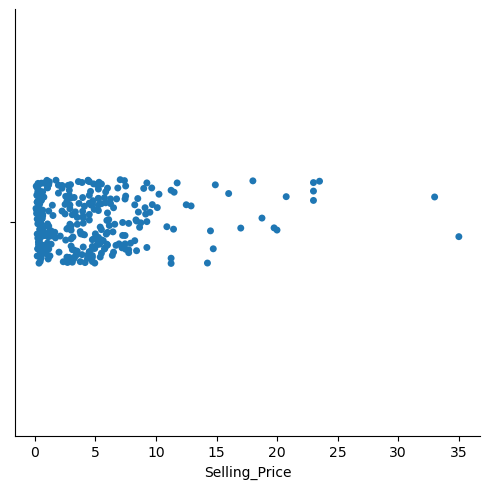

In [17]:
#ploting graph for better  visuaization
sns.catplot('Selling_Price',data=df)

<AxesSubplot:xlabel='Selling_Price', ylabel='Present_Price'>

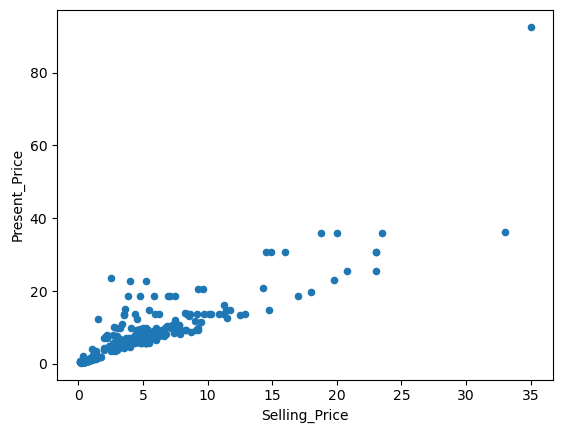

In [18]:
#selling and presnt price relation ship
df.plot.scatter(x='Selling_Price',y='Present_Price')

petrol car and bike selling more than combine disel and cng

C:\Users\91888\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

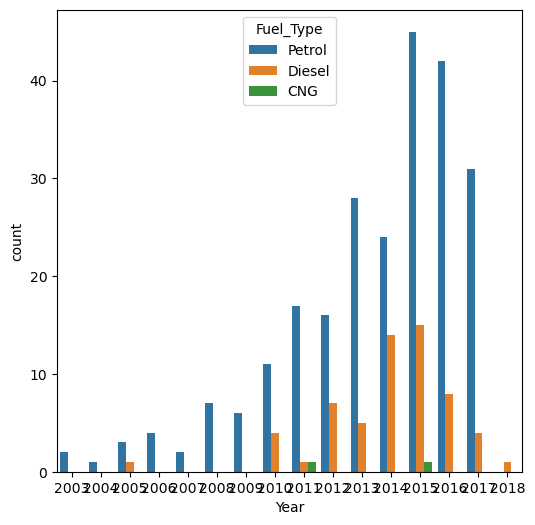

In [21]:
fig=plt.figure(figsize=(6,6))
sns.countplot('Year',hue='Fuel_Type',data=df)

which car has more transmission man or automatic

C:\Users\91888\anaconda3\lib\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\91888\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 500x500 with 0 Axes>

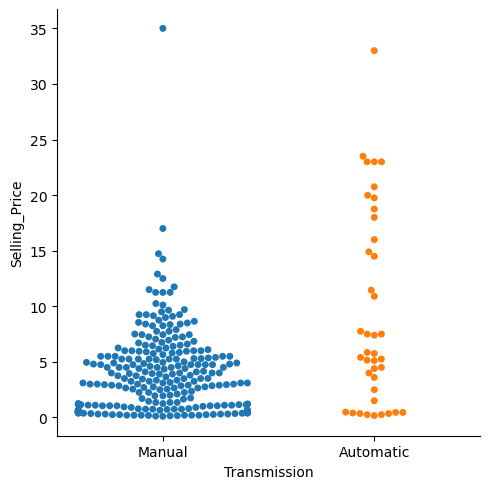

In [28]:
plt.figure(figsize=(5,5))
sns.catplot(data=df,kind='swarm',x="Transmission",y="Selling_Price", split=True)

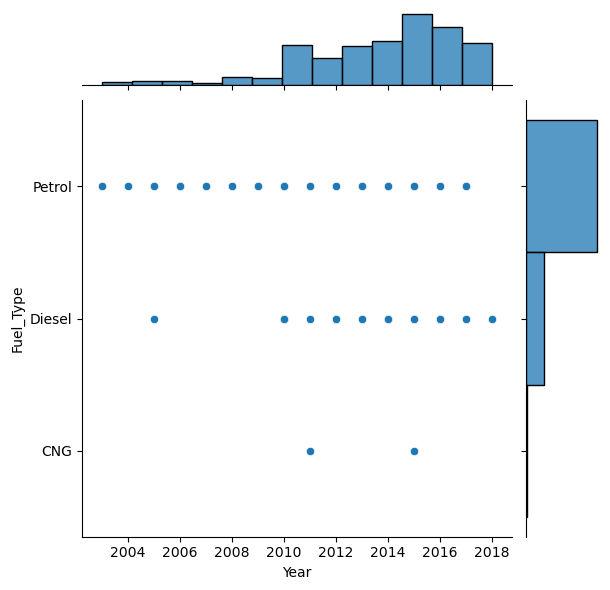

In [32]:
sns.jointplot(data=df, x="Year",y="Fuel_Type")

<AxesSubplot:xlabel='Selling_Price', ylabel='Seller_Type'>

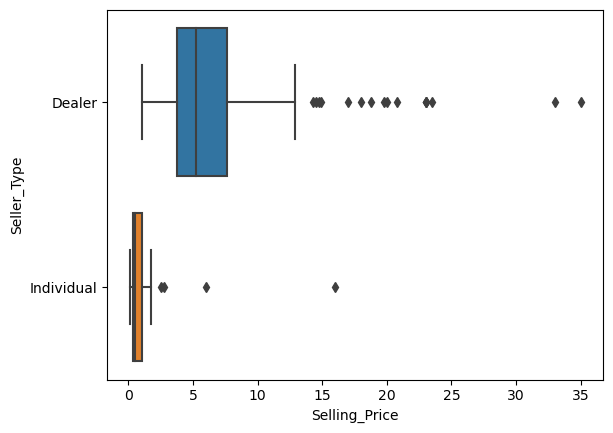

In [33]:
sns.boxplot(x='Selling_Price',y='Seller_Type',data=df)

<AxesSubplot:xlabel='Year', ylabel='Selling_Price'>

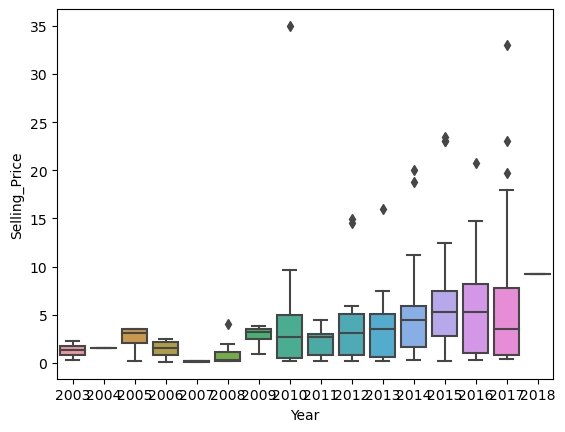

In [36]:
sns.boxplot(x='Year',y='Selling_Price',data=df)

# drop carname because many unique no are there

In [38]:
df.drop('Car_Name',axis=1,inplace=True)
df.head(5)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# convert year col

In [42]:
df['curr_Year']=2020
df["Years"]=df.curr_Year - df.Year
df.drop(["Year",'curr_Year'],axis=1,inplace=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [44]:
categorical_coloumns=df.select_dtypes(include="object")
for i in categorical_coloumns:
    print('coloumn name {} -> {} : {}'.format(i,df[i].nunique(),df[i].unique()))

coloumn name Fuel_Type -> 3 : ['Petrol' 'Diesel' 'CNG']
coloumn name Seller_Type -> 2 : ['Dealer' 'Individual']
coloumn name Transmission -> 2 : ['Manual' 'Automatic']


In [46]:
#get dummies
df=pd.get_dummies(df,drop_first=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


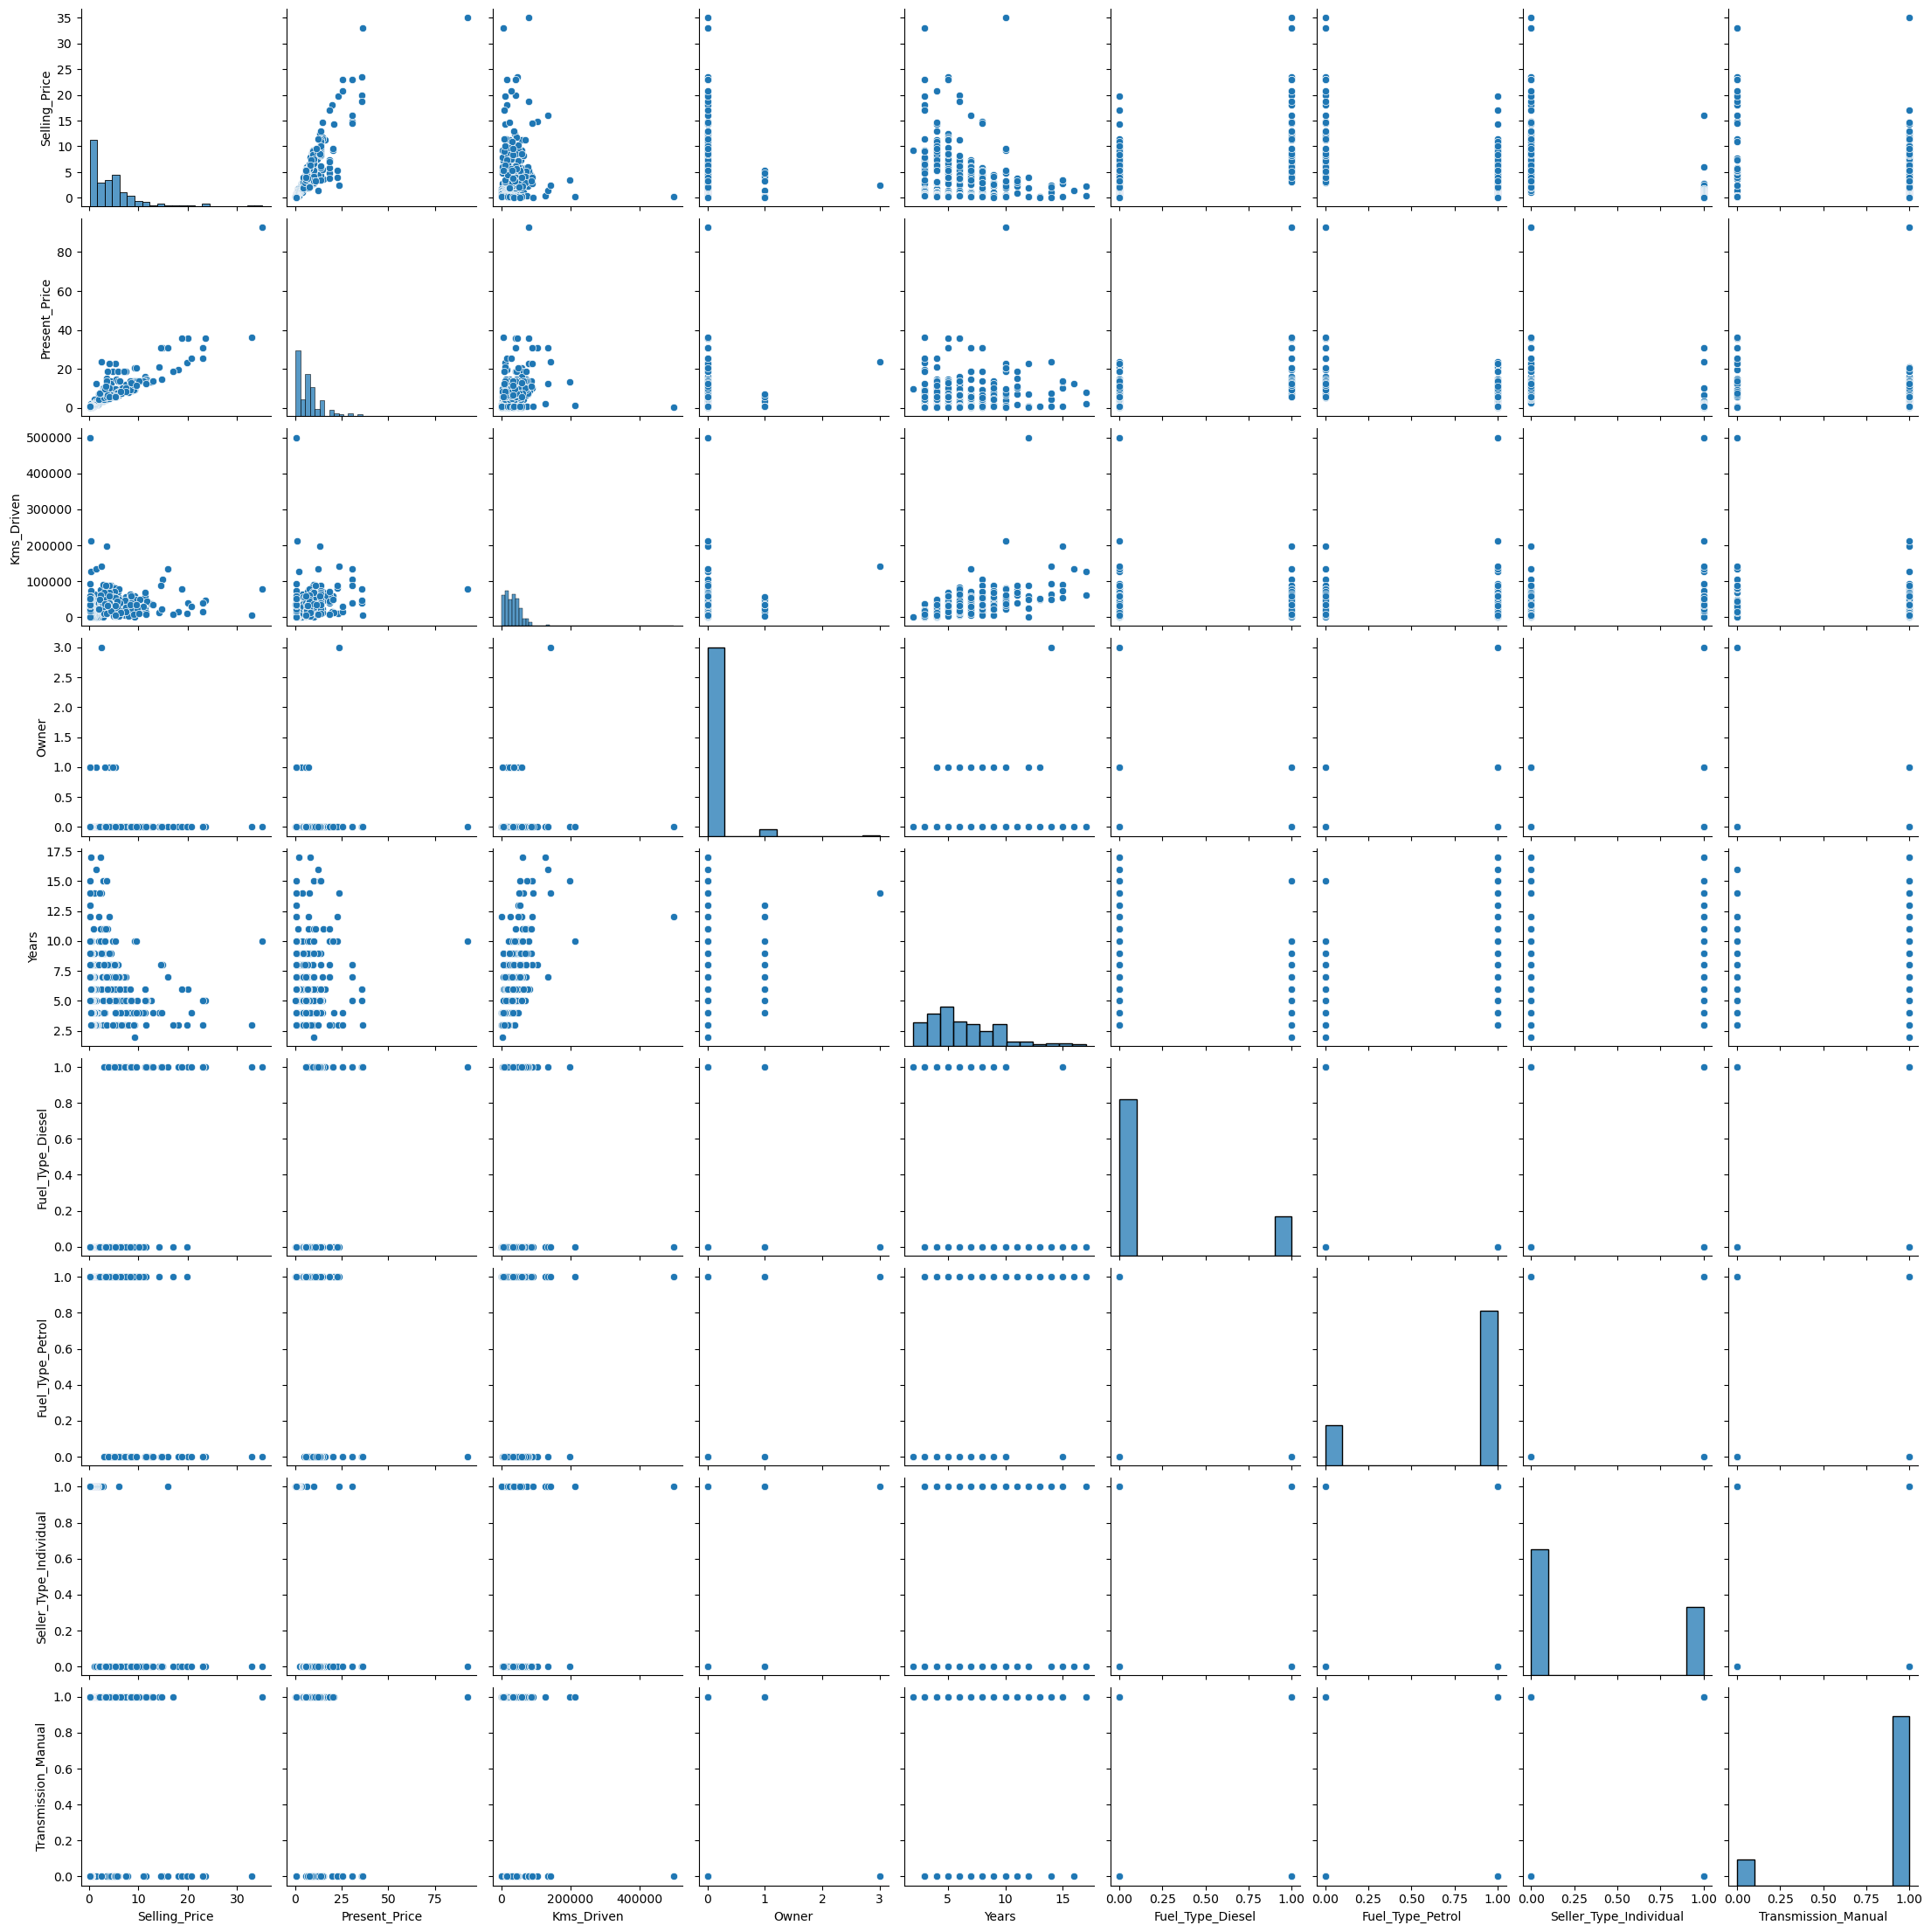

In [47]:
sns.pairplot(data=df)

<AxesSubplot:>

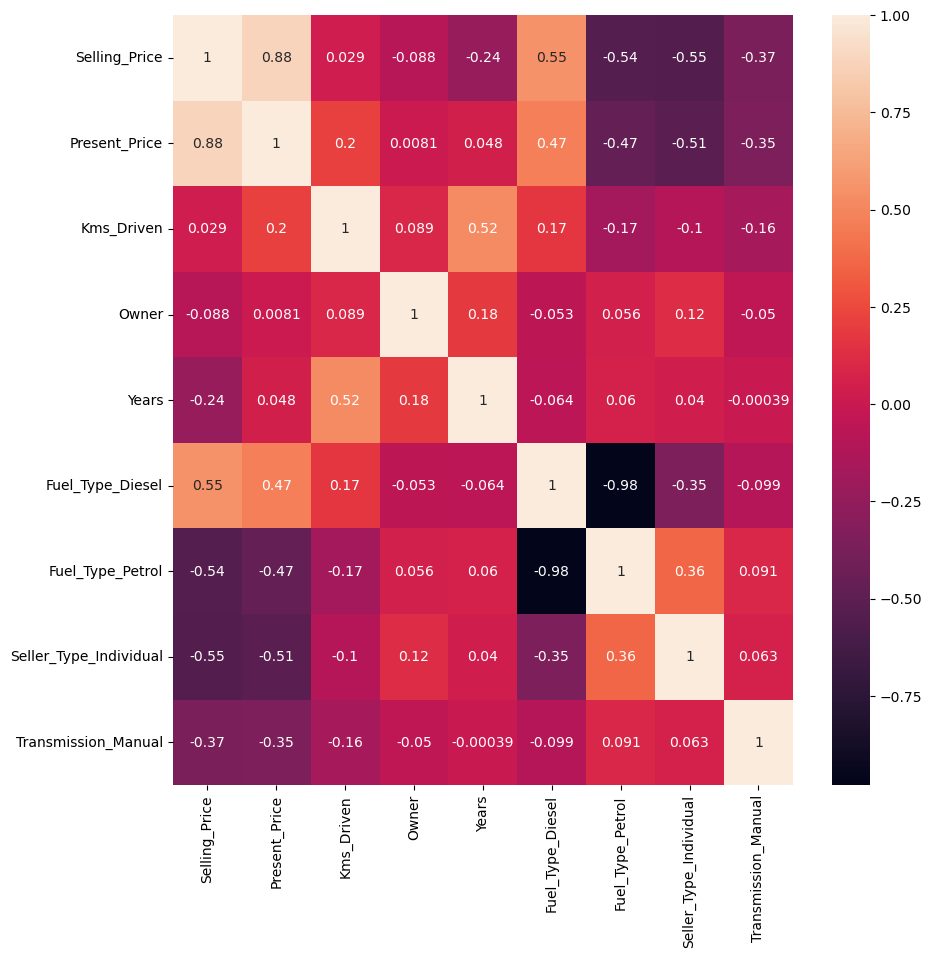

In [52]:
#corelation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [60]:
X=df.drop('Selling_Price',axis=1)
y=df['Selling_Price']

In [61]:
print(X.shape)
print(y.shape)

(301, 8)
(301,)


In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [70]:
print(X_train[0])
print(X_test[0])

[0.00465973 0.05105105 0.33333333 0.64285714 0.         1.
 1.         1.        ]
[0.00169252 0.16958776 0.         0.14285714 0.         1.
 1.         0.        ]


In [74]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
model=LinearRegression()
model.fit(X_train,y_train)
model.fit(X_test,y_test)




LinearRegression()

# Decision tree


In [75]:
from sklearn.tree import DecisionTreeRegressor
model= DecisionTreeRegressor()
model.fit(X_train,y_train)
model.fit(X_test,y_test)



DecisionTreeRegressor()

In [ ]:
#support vector machine